In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# First, make sure I am clear about how convolution works

In this case, because performace is outside of my consideration, I use extreme high resolution to minimize the effect of approximation.

Define a function that returns log-gaussian. It should ensure that the mean value is equal to $d$.


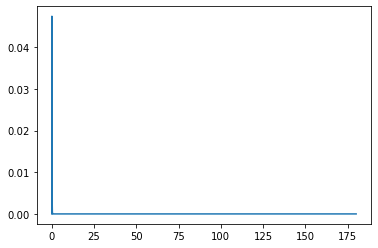

In [13]:
resolution = 4096 / 44100 / 20

def log_gaus(x_axis, d):
    sigma_square = math.log(1 / (10 * 4096 / 44100) + 1) / 2  # a fixed value
    sigma = math.sqrt(sigma_square)
    mu = math.log(d) - sigma_square / 2
    result = np.divide(1, x_axis, where=x_axis!=0) * sigma * math.sqrt(2 * math.pi) * np.exp(
        - ((np.log(x_axis, where=x_axis!=0) - mu) ** 2 / (2 * sigma ** 2)))
    result[0] = 0
    result /= np.sum(result)
    return result

d = 4096 / 44100
x_axis = np.arange(0, 180, resolution)
y_axis = log_gaus(x_axis, d)
plt.plot(x_axis, y_axis)

In [14]:
np.dot(x_axis, y_axis)

0.0928797983790775

In [15]:
d

0.09287981859410431

# Let's convolve

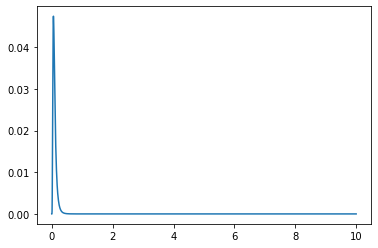

In [5]:
conv_y_axis = np.convolve(y_axis, y_axis)[:len(x_axis)]
plt.plot(x_axis, y_axis)

Check mode

In [6]:
2 * x_axis[np.argmax(y_axis)]

0.11145578231292516

In [7]:
x_axis[np.argmax(conv_y_axis)]

0.13931972789115646

Check mean

In [8]:
2 * (np.dot(x_axis, y_axis))

0.1857595967581457

In [9]:
np.dot(x_axis, conv_y_axis)

0.18575959675814452

Check mode+mean

In [10]:
x_axis[np.argmax(y_axis)] + np.dot(x_axis, y_axis)

0.14860768953553544

In [11]:
x_axis[np.argmax(conv_y_axis)]

0.13931972789115646